## This notebook archives some of previous experimental code that may be useful in the future.

In [1]:
%matplotlib inline
from ANN_simulation import *

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


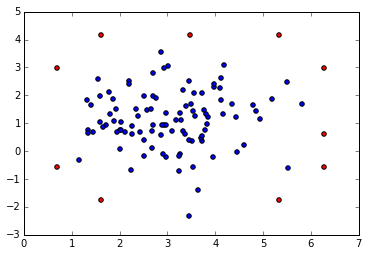

In [6]:
# test finding boundary function

my_network = pickle.load(open('../resources/network_1.pkl','rb'))
b=simulation_management(my_network)

x = list(np.random.normal(3, 1, 100))
y = list(np.random.normal(1, 1, 100))
temp_data = zip(*[x,y])

boundary = b.get_boundary_points_2(list_of_points=temp_data)

[x1, y1] = zip(*boundary)

plt.scatter(x,y)
plt.scatter(x1,y1, c='red')

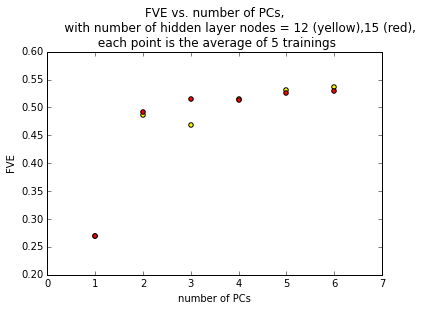

In [3]:
a=[[0.269641611258,0.486201139459,0.469347822853,0.514719568248,0.531066183431,0.536134936536],
   [0.27012669883,0.49126458993,0.514859185285,0.51402610015,0.526693395889,0.529315795038]]

fig, ax = plt.subplots()
ax.scatter(range(1,7), a[0],c='yellow')
ax.scatter(range(1,7), a[1], c='red')

ax.set_title('FVE vs. number of PCs, \n\
             with number of hidden layer nodes = 12 (yellow),15 (red),\n each point is the average of 5 trainings')
ax.set_xlabel('number of PCs')
ax.set_ylabel('FVE')

In [ ]:
# train on previous data with circular network

def train_on_previous_data_using_circular(index):
    a = neural_network_for_simulation(index=1, 
                                      training_data_interval = 5,
                                      data_set_for_training= cossin_data,
                                      node_num = [8, 12, 4, 12, 8],   # circular
                                      hidden_layers_types=[TanhLayer, CircularLayer, TanhLayer],
                                      max_num_of_training=30
                                     )
    a.train()
    a.save_into_file('previous_data_with_circular_node_index_%d.pkl' % index)

    a = pickle.load(open('previous_data_with_circular_node_index_%d.pkl' % index,'rb'))

    mid_res = a.get_mid_result()

    mid_result_1 = [item[1] for item in mid_res]
    mid_result_3 = [item[3] for item in mid_res]

    ml_angles_1 = [acos(item[0]) * np.sign(item[1]) for item in mid_result_1]
    ml_angles_2 = [acos(item[2]) * np.sign(item[3]) for item in mid_result_1]

    phi = [item[1] for item in sutils.get_many_dihedrals_from_cossin(a._data_set)]
    psi = [item[2] for item in sutils.get_many_dihedrals_from_cossin(a._data_set)]

    fig = plt.figure()
    fig.set_size_inches(10, 20)
    ax1 = fig.add_subplot(121, aspect='equal')
    ax1.scatter(ml_angles_1, ml_angles_2, c=phi)

    ax2 = fig.add_subplot(122, aspect='equal')
    ax2.scatter(ml_angles_1, ml_angles_2, c=psi)
    
    fig.savefig('previous_data_with_circular_%d.png' % index)
    
train_on_previous_data_using_circular(1)

In [ ]:
# plotting in PC space when dim of PC = 3, using 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

a=pickle.load(open('../resources/network_numPC_3_numHiddenLayerNode_15_index_3.pkl','rb'))
# print(a._node_num)
# a.get_fraction_of_variance_explained()
temp_mid_result = a.get_mid_result()
PC_3D = [item[1] for item in temp_mid_result]
x = [item[0] for item in PC_3D]
y = [item[1] for item in PC_3D]
z = [item[2] for item in PC_3D]

dihedrals = a.get_many_dihedrals_from_coordinates_in_file(a._list_of_coor_data_files)
phi = [item[1] for item in dihedrals]
psi = [item[2] for item in dihedrals]
phi_plus_psi = [item[1]+item[2] for item in dihedrals]
phi_minus_psi = [item[1]-item[2] for item in dihedrals]

assert(len(phi) == len(PC_3D))

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(x,y,z, c=psi)
sciio.savemat('temp.mat', 
              {'x':x, 'y':y, 'z':z,
               'phi_plus_psi':phi_plus_psi,
               'phi_minus_psi': phi_minus_psi})
plt.show()

In [ ]:
# test new finding boundary function

%matplotlib inline

mean = [0, 0]
cov = [[0.1, 0], [0, 0.1]]  # diagonal covariance

get_points = lambda mean: np.random.multivariate_normal(mean, cov, 5000)


import matplotlib.pyplot as plt
import numpy as np

points = reduce(lambda x, y: np.concatenate((x, y)), map(get_points, [[0,0], [-2,-2]]))

print(points)


x, y = points.T

hist_matrix, _, _ = np.histogram2d(x, y)

temp = hist_matrix - (np.roll(hist_matrix, 1, axis=0) + np.roll(hist_matrix, -1, axis=0) + np.roll(hist_matrix, 1, axis=1) + np.roll(hist_matrix, -1, axis=1))/4

temp[np.where(temp > 0)] = 0

# im = plt.imshow(temp)
# plt.colorbar()
# plt.show()

from ANN_simulation import *

boundary_points = sutils.get_boundary_points_3_for_circular_network(points, preprocessing=True)

x, y = zip(*points); x1, y1 = zip(*boundary_points)

plt.scatter(x, y, c='b')
plt.scatter(x1, y1, c='r')